Using TensorFlow backend.


(50000, 28, 28) (50000,)


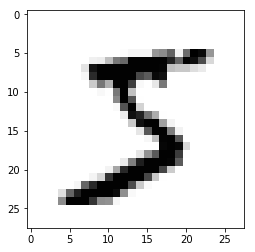

In [1]:
from preprocessed_mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
print(X_train.shape, y_train.shape)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap="Greys");

In [2]:
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [3]:
s = tf.InteractiveSession()

In [4]:
# Flatten images
X_train = X_train.reshape(X_train.shape[0], -1)
X_val = X_val.reshape(X_val.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
# One hot encode labels
ohe = OneHotEncoder(sparse=False)
y_train = ohe.fit_transform(y_train.reshape(-1, 1))
y_val = ohe.transform(y_val.reshape(-1, 1))
y_test = ohe.transform(y_test.reshape(-1, 1))
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(50000, 784)
(10000, 784)
(10000, 784)
(50000, 10)
(10000, 10)
(10000, 10)


In [5]:
# params
n_classes = y_train.shape[1]
n_features = X_train.shape[1]
n_hidden_neurons = 64
learning_rate = 7e-2
print('#classes: ', n_classes)

#classes:  10


In [6]:
# X: [n-samples, n-dimension]
# y: [n-samples, n-classes]
input_X = tf.placeholder(tf.float32, [None, n_features], name='inputX')
input_y = tf.placeholder(tf.float32, [None, n_classes], name='inputy')

In [7]:
# Hidden layer
weights_hidden = tf.Variable(tf.random_normal([n_features, n_hidden_neurons]))
bias_hidden = tf.Variable(tf.random_normal([n_hidden_neurons]))
preactivations_hidden = tf.add(tf.matmul(input_X, weights_hidden), bias_hidden)
activations_hidden = tf.nn.relu(preactivations_hidden)

In [8]:
# weights: [n-dimensions, n-classes]
# biases: [n-classes]
weights = tf.Variable(initial_value=tf.zeros([n_hidden_neurons, n_classes]), name='weights')
b = tf.Variable(initial_value=tf.zeros([n_classes]), dtype=tf.float32, name='biases')

In [9]:
# model
predicted_y = tf.nn.softmax(tf.matmul(activations_hidden, weights) + b)
loss = -tf.reduce_mean((tf.log(predicted_y) * input_y) + (tf.log(1 - predicted_y) * (1 - input_y)))
optimizer = tf.train.MomentumOptimizer(learning_rate=learning_rate, momentum=0.8).minimize(loss)

In [10]:
def minibatch(X, y, batch_size=64):
    choices = np.random.choice(X.shape[0], batch_size)
    return X[choices, :], y[choices, :]

--------40 of 400--------
loss: 0.1267
train auc: 0.9620764638312747
val auc: 0.9693841722628532
--------80 of 400--------
loss: 0.1166
train auc: 0.9681958880240368
val auc: 0.9739759453267067
--------120 of 400--------
loss: 0.1182
train auc: 0.9701868014728381
val auc: 0.9751409641562716
--------160 of 400--------
loss: 0.1126
train auc: 0.9710918662617318
val auc: 0.9761649050143028
--------200 of 400--------
loss: 0.1087
train auc: 0.9721995418938091
val auc: 0.9771605726704321
--------240 of 400--------
loss: 0.1102
train auc: 0.9724711911941585
val auc: 0.9769584997125189
--------280 of 400--------
loss: nan
train auc: 0.9721267037320549
val auc: 0.9768627853084576
--------320 of 400--------
loss: 0.1081
train auc: 0.973850967151451
val auc: 0.978071485979029
--------360 of 400--------
loss: 0.1082
train auc: 0.9742531748367069
val auc: 0.9782871398567299
--------400 of 400--------
loss: 0.1166
train auc: 0.9727102550395225
val auc: 0.9768287689563335


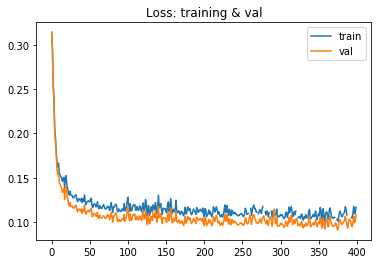

Test auc: 0.976324009919898


In [11]:
from sklearn.metrics import roc_auc_score
batch_size = 128
n_epochs = 400
train_losses = []
val_losses = []
s.run(tf.global_variables_initializer())
for i in range(1, n_epochs + 1):
    batch_X, batch_y = minibatch(X_train, y_train, batch_size)
    s.run(optimizer, {input_X: batch_X, input_y: batch_y})
    loss_train = s.run(loss, {input_X: X_train, input_y: y_train})
    loss_val = s.run(loss, {input_X: X_val, input_y: y_val})
    train_losses.append(loss_train)
    val_losses.append(loss_val)
    if i % (n_epochs // 10) == 0:
        print('-' * 8 + str(i) + ' of ' + str(n_epochs) + '-' * 8)
        print("loss: %.4f" % (loss_train))
        print("train auc:",
              roc_auc_score(y_train, s.run(predicted_y, {input_X: X_train})))
        print("val auc:",
              roc_auc_score(y_val, s.run(predicted_y, {input_X: X_val})))

plt.plot(train_losses, label='train')
plt.plot(val_losses, label='val')
plt.legend()
plt.title('Loss: training & val')
plt.show()

print("Test auc:", roc_auc_score(y_test, s.run(predicted_y,
                                               {input_X: X_test})))